In [2]:
import numpy as np
import matplotlib.pyplot as plt

def normalize(matrix):
    """
    Normalize the decision matrix.
    """
    norm_matrix = np.copy(matrix)
    num_rows, num_cols = norm_matrix.shape
    for j in range(num_cols):
        col_sum = np.sum(norm_matrix[:, j])
        for i in range(num_rows):
            norm_matrix[i, j] /= col_sum
    return norm_matrix

def weighted_normalized(matrix, weights):
    """
    Compute the weighted normalized decision matrix.
    """
    norm_matrix = normalize(matrix)
    weighted_matrix = norm_matrix * weights
    return weighted_matrix

def ideal_worst(matrix, maximization=True):
    """
    Compute the ideal and worst alternatives.
    """
    if maximization:
        ideal = np.max(matrix, axis=0)
        worst = np.min(matrix, axis=0)
    else:
        ideal = np.min(matrix, axis=0)
        worst = np.max(matrix, axis=0)
    return ideal, worst

def euclidean_distance(matrix, ideal):
    """
    Compute the Euclidean distance.
    """
    num_rows, num_cols = matrix.shape
    distances = np.zeros(num_rows)
    for i in range(num_rows):
        distances[i] = np.sqrt(np.sum((matrix[i] - ideal) ** 2))
    return distances

def topsis(matrix, weights, maximization=True):
    """
    Perform TOPSIS analysis.
    """
    weighted_matrix = weighted_normalized(matrix, weights)
    ideal, worst = ideal_worst(weighted_matrix, maximization)
    dist_to_ideal = euclidean_distance(weighted_matrix, ideal)
    dist_to_worst = euclidean_distance(weighted_matrix, worst)
    performance_score = dist_to_worst / (dist_to_ideal + dist_to_worst)
    return performance_score

# Criteria names
criteria_names = ['Naturalness', 'Coherence', 'Context Sensitivity', 'Response Diversity', 'Efficiency']

# Example decision matrix (performance of models)
# Rows: Models
# Columns: Criteria
decision_matrix = np.array([
    [0.92, 0.84, 0.78, 0.87, 0.81],  # Model 1: BERT
    [0.85, 0.76, 0.90, 0.78, 0.89],  # Model 2: GPT-3
    [0.80, 0.88, 0.85, 0.83, 0.80],  # Model 3: Transformer-XL
    [0.86, 0.82, 0.78, 0.91, 0.88],  # Model 4: XLNet
    [0.79, 0.86, 0.89, 0.84, 0.87],  # Model 5: RoBERTa
    [0.88, 0.90, 0.85, 0.80, 0.82],  # Model 6: DistilBERT
    [0.83, 0.80, 0.92, 0.85, 0.78],  # Model 7: GPT-2
    [0.81, 0.79, 0.85, 0.82, 0.86],  # Model 8: BERTweet
    [0.85, 0.86, 0.88, 0.83, 0.84],  # Model 9: Albert
    [0.87, 0.81, 0.80, 0.88, 0.89]   # Model 10: T5
])

# Criteria weights
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

# Perform TOPSIS analysis
scores = topsis(decision_matrix, weights)

# Find the best model
best_model_index = np.argmax(scores)
best_model_score = scores[best_model_index]
model_names = ['BERT', 'GPT-3', 'Transformer-XL', 'XLNet', 'RoBERTa', 'DistilBERT', 'GPT-2', 'BERTweet', 'Albert', 'T5']
print("TOPSIS scores:", scores)
print("Best model index:", best_model_index)
print("Best model score:", best_model_score)
print("Best model name:", model_names[best_model_index])



TOPSIS scores: [0.50560554 0.45618842 0.4490533  0.52309149 0.5397178  0.549807
 0.47320928 0.37792547 0.56957807 0.52434944]
Best model index: 8
Best model score: 0.5695780651323031
Best model name: Albert


In [3]:
import csv
import numpy as np
from scipy.stats import rankdata

# Rest of the code remains the same...

# Calculate ranks
ranks = len(scores) - rankdata(scores).astype(int) + 1

# Save results to CSV file
results_file = "topsis_results.csv"
with open(results_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Rank', 'Model', 'TOPSIS Score'])
    for rank, model, score in zip(ranks, model_names, scores):
        writer.writerow([rank, model, score])

print(f"Results saved to {results_file}")


Results saved to topsis_results.csv


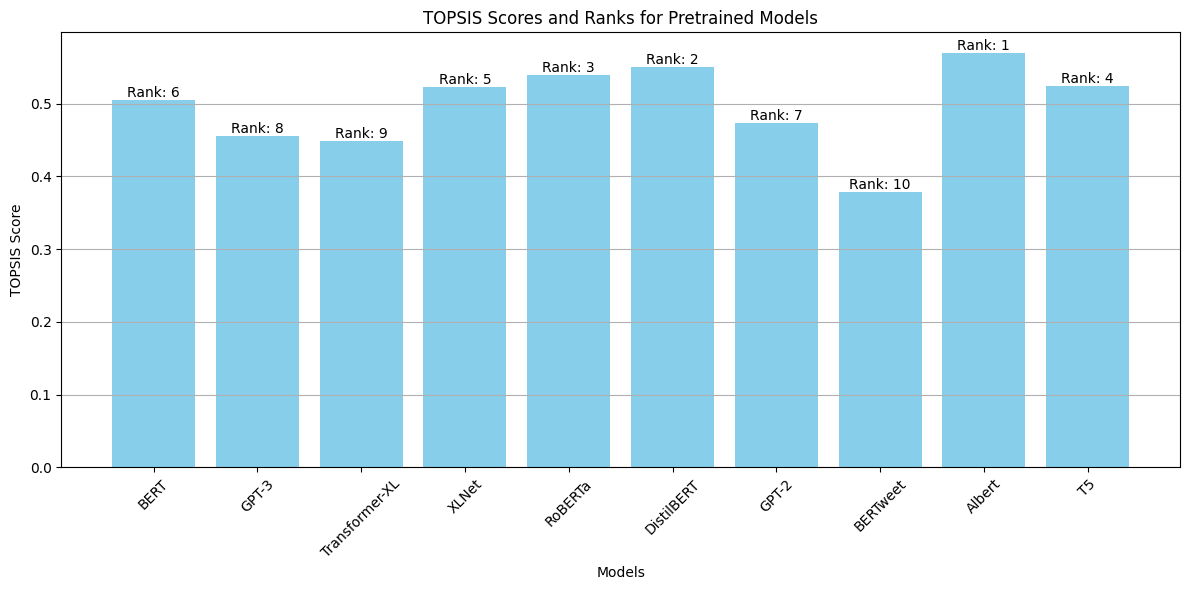

In [4]:
import csv
import numpy as np
from scipy.stats import rankdata
import matplotlib.pyplot as plt



# Calculate ranks
ranks = len(scores) - rankdata(scores).astype(int) + 1

# Visualization
plt.figure(figsize=(12, 6))
bars = plt.bar(model_names, scores, color='skyblue')

for bar, rank in zip(bars, ranks):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'Rank: {rank}',
             ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('TOPSIS Score')
plt.title('TOPSIS Scores and Ranks for Pretrained Models')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


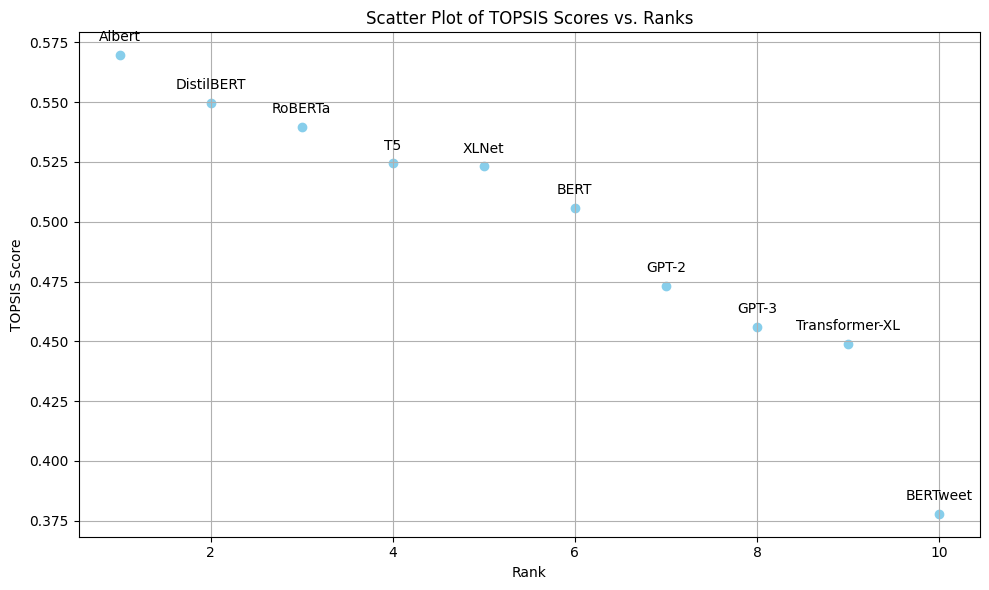

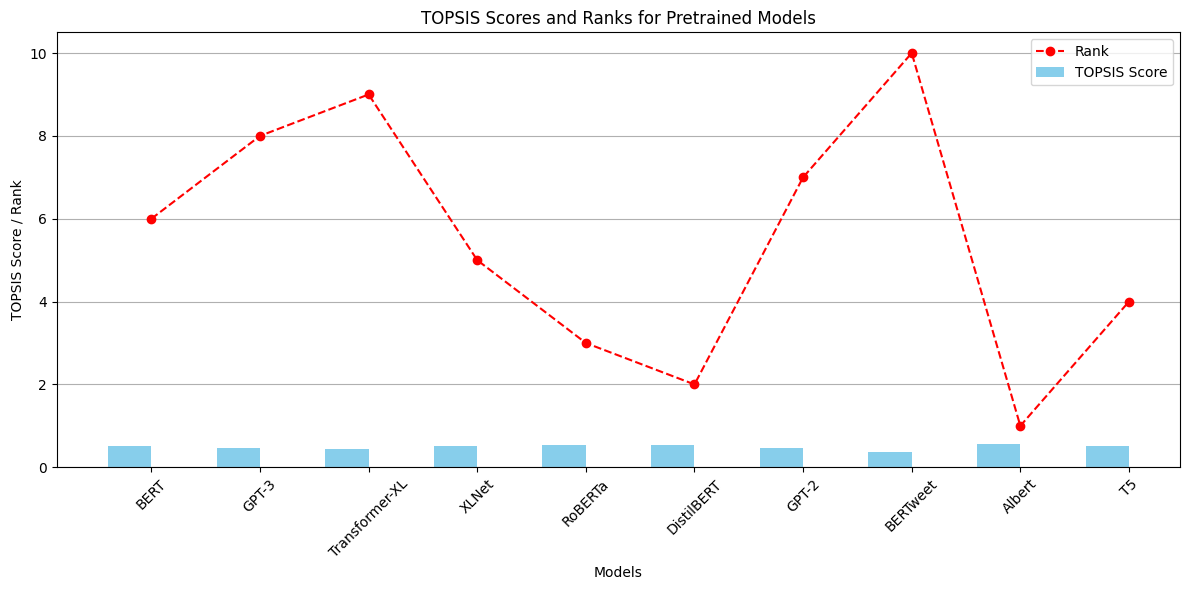

In [30]:
import csv
import numpy as np
from scipy.stats import rankdata
import matplotlib.pyplot as plt

# Calculate ranks
ranks = len(scores) - rankdata(scores).astype(int) + 1

# Visualization: Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(ranks, scores, color='skyblue', marker='o')
plt.title('Scatter Plot of TOPSIS Scores vs. Ranks')
plt.xlabel('Rank')
plt.ylabel('TOPSIS Score')
for i, txt in enumerate(model_names):
    plt.annotate(txt, (ranks[i], scores[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization: Combined Bar and Line Plot
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(model_names))

# Bar plot
bars = plt.bar(index, scores, bar_width, color='skyblue', label='TOPSIS Score')

# Line plot for ranks
plt.plot(index + bar_width / 2, ranks, color='red', linestyle='--', marker='o', label='Rank')

plt.xlabel('Models')
plt.ylabel('TOPSIS Score / Rank')
plt.title('TOPSIS Scores and Ranks for Pretrained Models')
plt.xticks(index + bar_width / 2, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()
